<a href="https://colab.research.google.com/github/manikanta-eng/AIML-2025/blob/main/lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Linear Regression Model Using US Housing Data



Part-1 Implement Linear Regression Model Using US Housing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [4]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353   2643.664412   
std        2.005166      2.137340           12.586937   2179.947071   
min     -124.350000     32.540000            1.000000      2.000000   
10%     -122.280000     33.620000           12.000000    949.000000   
25%     -121.790000     33.930000           18.000000   1462.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.000000     37.720000           37.000000   3151.250000   
90%     -117.240000     38.480000           46.000000   4677.100000   
max     -114.310000     41.950000           52.000000  37937.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean       539.410824   1429.573941    501.221941       3.883578   
std        421.499452   1147.852959    384.520841       1.908157   
min          1.000000      3.000000      1.000000       0.499900   
10%        199.000000    514.000000    185.000000       1.910700   
25%        297.000000    790.000000    282.000000       2.566375   
50%        434.000000   1167.000000    409.000000       3.544600   
75%        648.250000   1721.000000    605.250000       4.767000   
90%        968.000000   2578.200000    893.000000       6.194900   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
10%          81900.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
90%         379600.000000  
max         500001.000000

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

Basic plotting and visualization on the data set

pairplots using seaborn

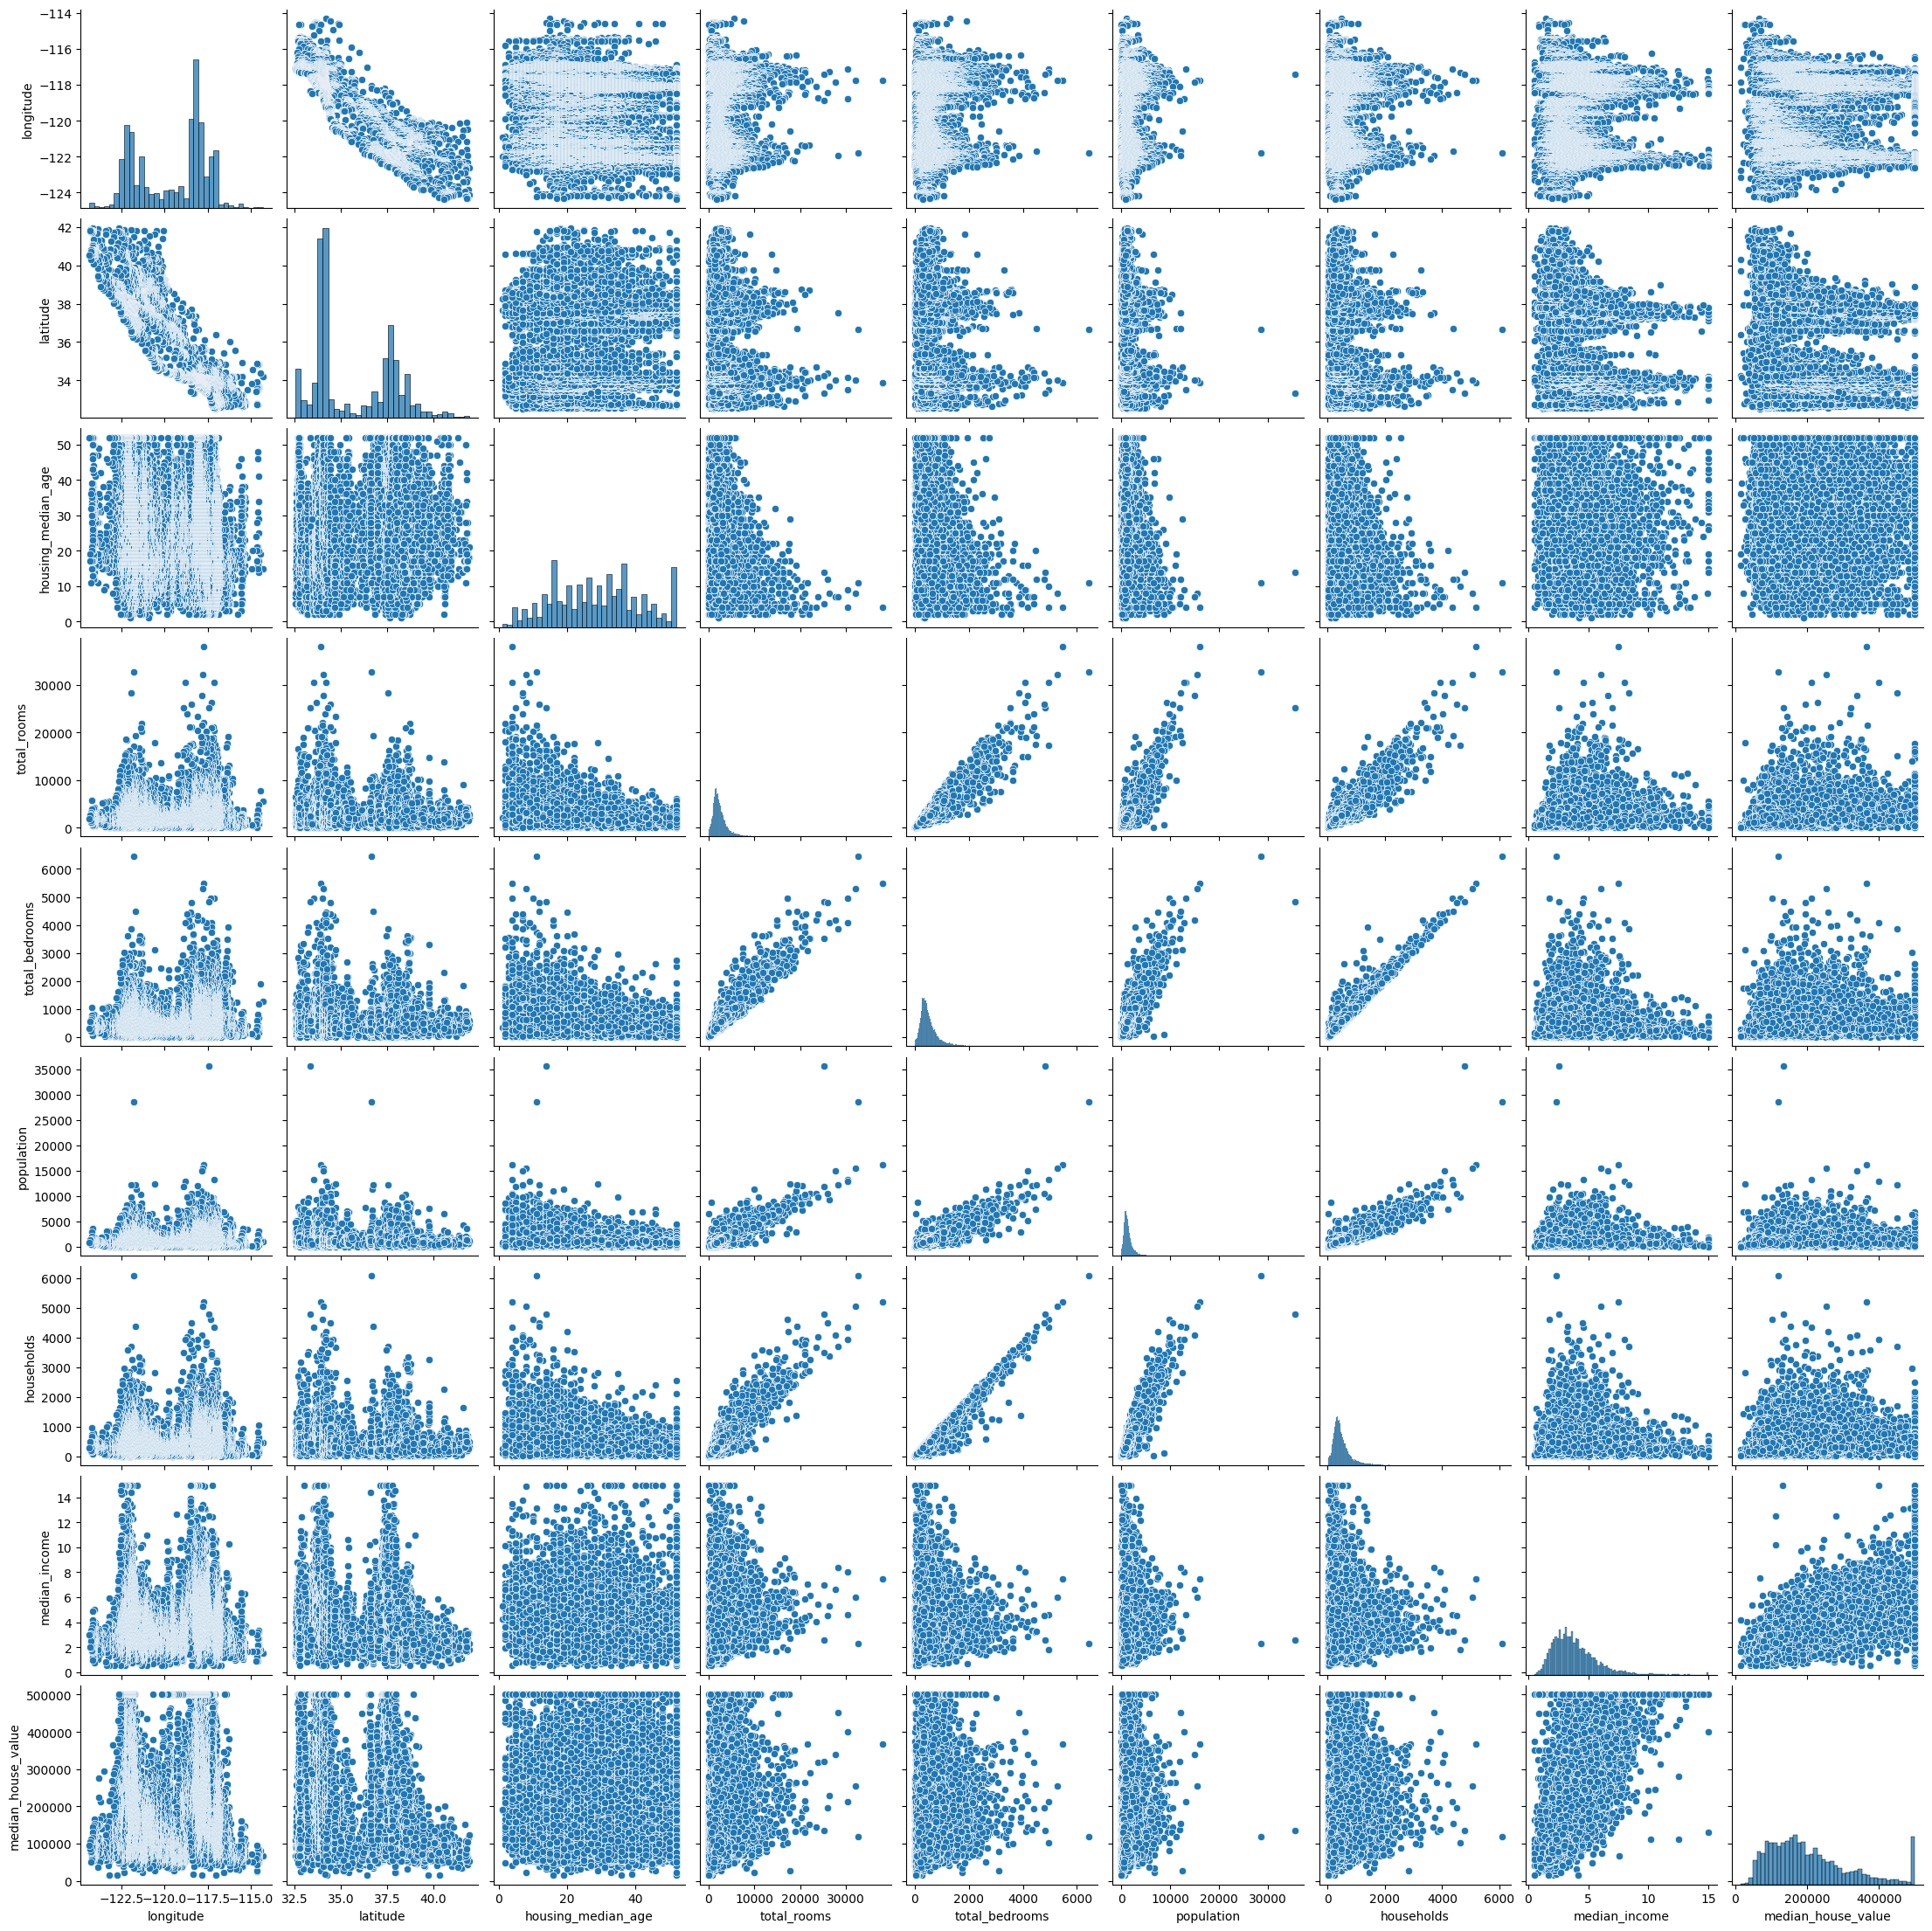

In [6]:
sns.pairplot(df)

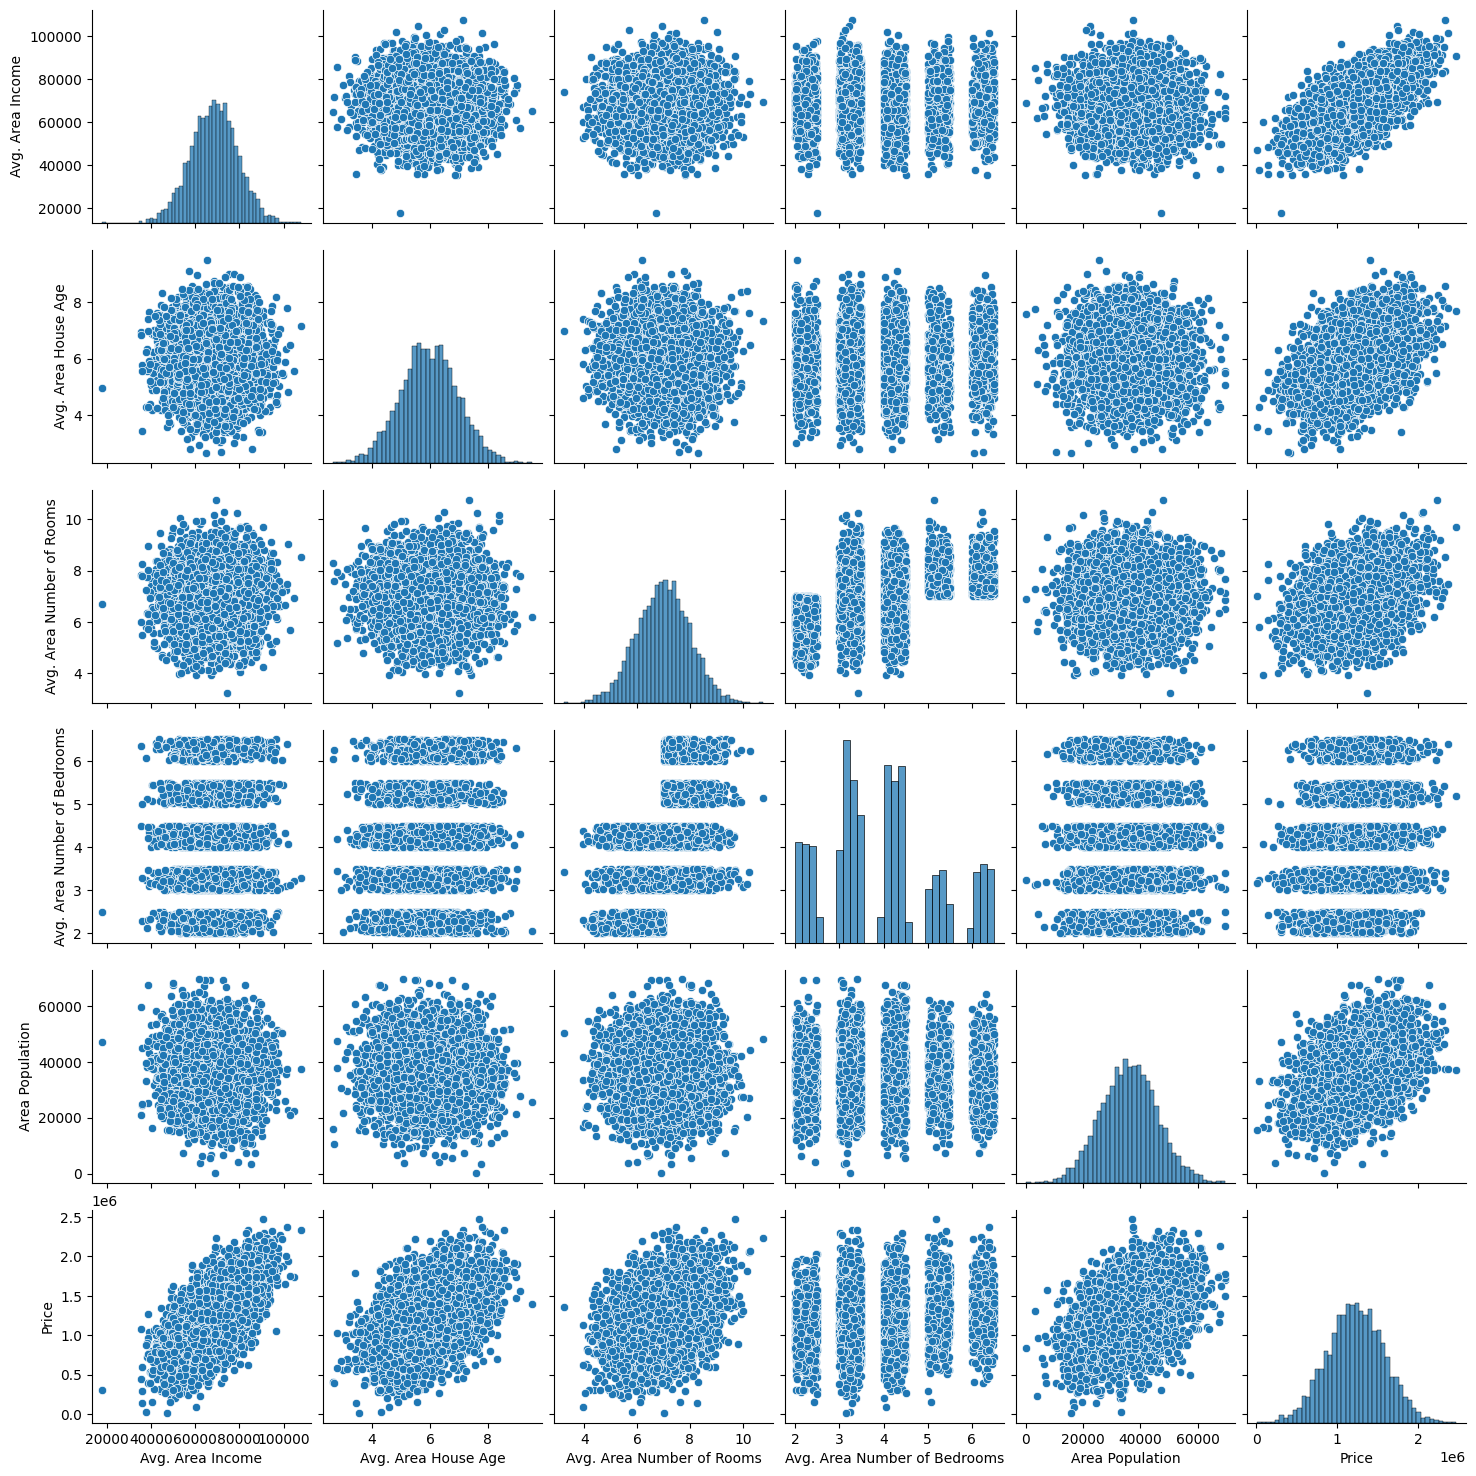

Distribution of Housing price (the predicted quantity)

Text(0, 0.5, 'Density')

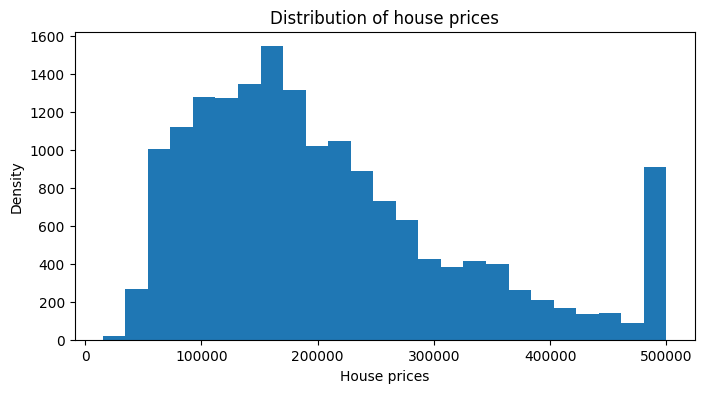

In [7]:
df ['median_house_value'].plot.hist(bins=25,figsize=(8,4))
plt.title("Distribution of house prices")
plt.xlabel("House prices")
plt.ylabel("Density")


Text(0, 0.5, 'Density')

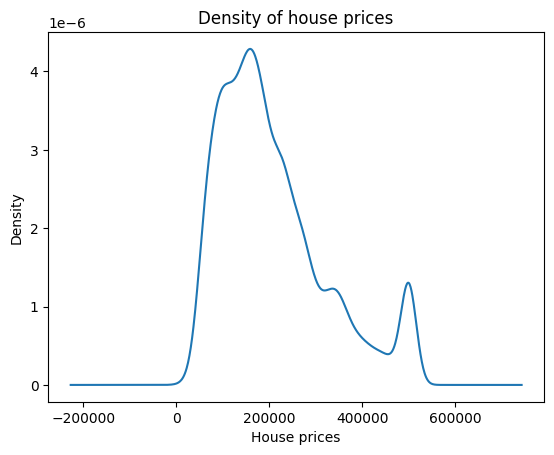

In [8]:
## plot the dencity of Housing prices
df['median_house_value'].plot.density()
plt.title("Density of house prices")
plt.xlabel("House prices")
plt.ylabel("Density")


Correlation matrix and heatmap

In [9]:
df.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.925208           -0.114250     0.047010   
latitude            -0.925208  1.000000            0.016454    -0.038773   
housing_median_age  -0.114250  0.016454            1.000000    -0.360984   
total_rooms          0.047010 -0.038773           -0.360984     1.000000   
total_bedrooms       0.071802 -0.069373           -0.320434     0.928403   
population           0.101674 -0.111261           -0.295890     0.860170   
households           0.059628 -0.074902           -0.302754     0.919018   
median_income       -0.015485 -0.080303           -0.115932     0.195383   
median_house_value  -0.044982 -0.144917            0.106758     0.130991   

                    total_bedrooms  population  households  median_income  \
longitude                 0.071802    0.101674    0.059628      -0.015485   
latitude                 -0.069373   -0.111261   -0.074902      -0.080303   
housing_median_age       -0.320434   -0.295890   -0.302754      -0.115932   
total_rooms               0.928403    0.860170    0.919018       0.195383   
total_bedrooms            1.000000    0.881169    0.980920      -0.013495   
population                0.881169    1.000000    0.909247      -0.000638   
households                0.980920    0.909247    1.000000       0.007644   
median_income            -0.013495   -0.000638    0.007644       1.000000   
median_house_value        0.045783   -0.027850    0.061031       0.691871   

                    median_house_value  
longitude                    -0.044982  
latitude                     -0.144917  
housing_median_age            0.106758  
total_rooms                   0.130991  
total_bedrooms                0.045783  
population                   -0.027850  
households                    0.061031  
median_income                 0.691871  
median_house_value            1.000000

<Axes: >

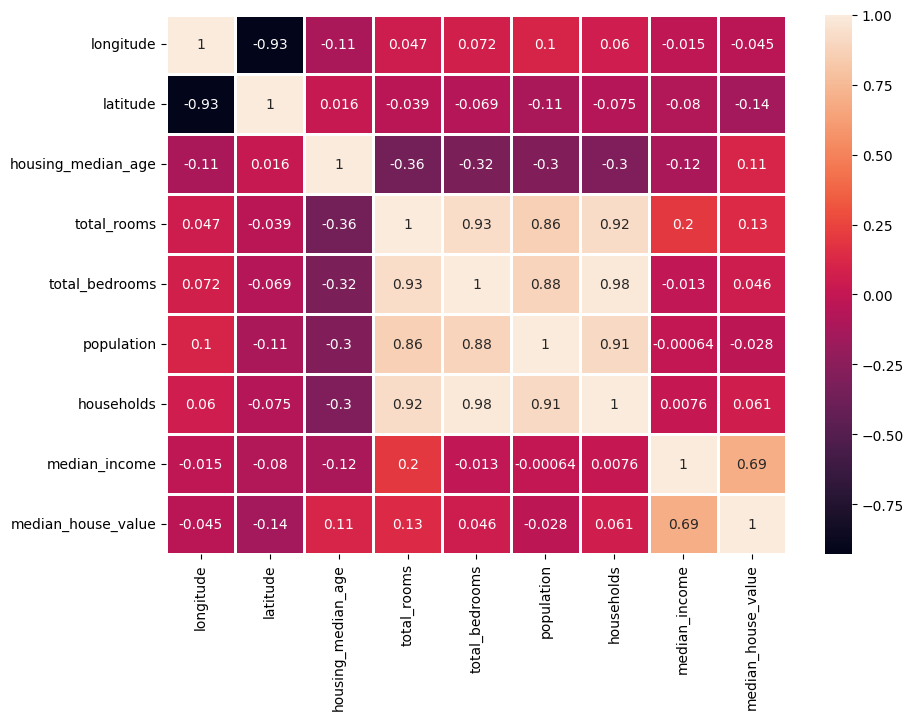

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

Feauter and variable set

Make a list od data frame column names



In [ ]:
## Numerical Columns
print("Numarical Columns:"df.columns[2:9])
# Non Numarical Columns
print("Non Numarical columns")

In [17]:
## Y = MX +C where Y is dependent , X is independent feauters
## M is slope , C is intercep
l_column = list(df.columns) # making a list out of column names
len_feature = len(l_column) #
l_column, len_feature


(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value'],
 9)

In [18]:
X = df[l_column[2:len_feature-1]]
y = df[l_column[len_feature-1]]

In [19]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)

Feature set size: (17000, 6)
Variable set size: (17000,)


In [20]:
X.head()

housing_median_age  total_rooms  total_bedrooms  population  households  \
0                15.0       5612.0          1283.0      1015.0       472.0   
1                19.0       7650.0          1901.0      1129.0       463.0   
2                17.0        720.0           174.0       333.0       117.0   
3                14.0       1501.0           337.0       515.0       226.0   
4                20.0       1454.0           326.0       624.0       262.0   

   median_income  
0         1.4936  
1         1.8200  
2         1.6509  
3         3.1917  
4         1.9250

In [21]:
y.head()

0    66900.0
1    80100.0
2    85700.0
3    73400.0
4    65500.0
Name: median_house_value, dtype: float64

Part - 2 Test -train split

import train_test_split function frome scikit-learn

In [22]:
from sklearn.model_selection import train_test_split

create X and y train and test splits into 82-20 radio in one command using a split radio and a random seed

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)


In [24]:
y_train.shape, y_test.shape, X_train.shape

((13600,), (3400,), (13600, 6))